In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [2]:
#input data
df = pd.read_excel('IND.xlsx')
df.head()

,year,creditor,debtor,indicator,debt
0,1970,WLD,IND,DT.DOD.DECT.CD,8.425121e+09
1,1971,WLD,IND,DT.DOD.DECT.CD,9.328742e+09
2,1972,WLD,IND,DT.DOD.DECT.CD,1.002927e+10
3,1973,WLD,IND,DT.DOD.DECT.CD,1.096592e+10
4,1974,WLD,IND,DT.DOD.DECT.CD,1.269695e+10


In [3]:
X = df[['year']]
y = df['debt']

# Split data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)


In [12]:
# Evaluate model performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
r2 = r2_score(y_test, y_pred)

# Print results
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAPE: {mape}%")
print(f'R-squared: {r2}')

MAE: 6320496468.3271
MSE: 1.0815224412333046e+20
RMSE: 10399627114.62918
MAPE: 6.096141715438061%
R-squared: 0.9975658328314093


In [5]:
# Create a new DataFrame for the next 10 years
future_years = pd.DataFrame({'year': range(df['year'].max() + 1, df['year'].max() + 11)})

# Predictions for the next 10 years
y_pred_future = rf_model.predict(future_years)


future_forecast = pd.DataFrame({'year': future_years['year'], 'predicted_debt': y_pred_future})

# Print forecasted values
print(future_forecast)

   year  predicted_debt
0  2024    6.277005e+11
1  2025    6.277005e+11
2  2026    6.277005e+11
3  2027    6.277005e+11
4  2028    6.277005e+11
5  2029    6.277005e+11
6  2030    6.277005e+11
7  2031    6.277005e+11
8  2032    6.277005e+11
9  2033    6.277005e+11


In [6]:
# Predict debt for the original dataset
df['predicted_debt'] = rf_model.predict(df[['year']])

# Calculate residuals (Actual - Predicted)
df['residual'] = df['debt'] - df['predicted_debt']

# Print the dataset with actual debt, predicted debt, and residuals
print(df[['year', 'debt', 'predicted_debt', 'residual']])

    year          debt  predicted_debt      residual
0   1970  8.425121e+09    9.220758e+09 -7.956371e+08
1   1971  9.328742e+09    9.591243e+09 -2.625006e+08
2   1972  1.002927e+10    1.001786e+10  1.141112e+07
3   1973  1.096592e+10    1.001786e+10  9.480597e+08
4   1974  1.269695e+10    1.029744e+10  2.399514e+09
5   1975  1.386561e+10    1.364471e+10  2.209019e+08
6   1976  1.458639e+10    1.594473e+10 -1.358337e+09
7   1977  1.541466e+10    1.662151e+10 -1.206849e+09
8   1978  1.652025e+10    1.662151e+10 -1.012578e+08
9   1979  1.819038e+10    1.878868e+10 -5.982986e+08
10  1980  2.072336e+10    2.023647e+10  4.868917e+08
11  1981  2.248007e+10    2.192592e+10  5.541593e+08
12  1982  2.694286e+10    2.274406e+10  4.198801e+09
13  1983  3.064949e+10    2.945564e+10  1.193855e+09
14  1984  3.276396e+10    3.545344e+10 -2.689483e+09
15  1985  3.893481e+10    3.953511e+10 -6.002928e+08
16  1986  4.490944e+10    4.398841e+10  9.210372e+08
17  1987  5.342490e+10    4.886799e+10  4.5569

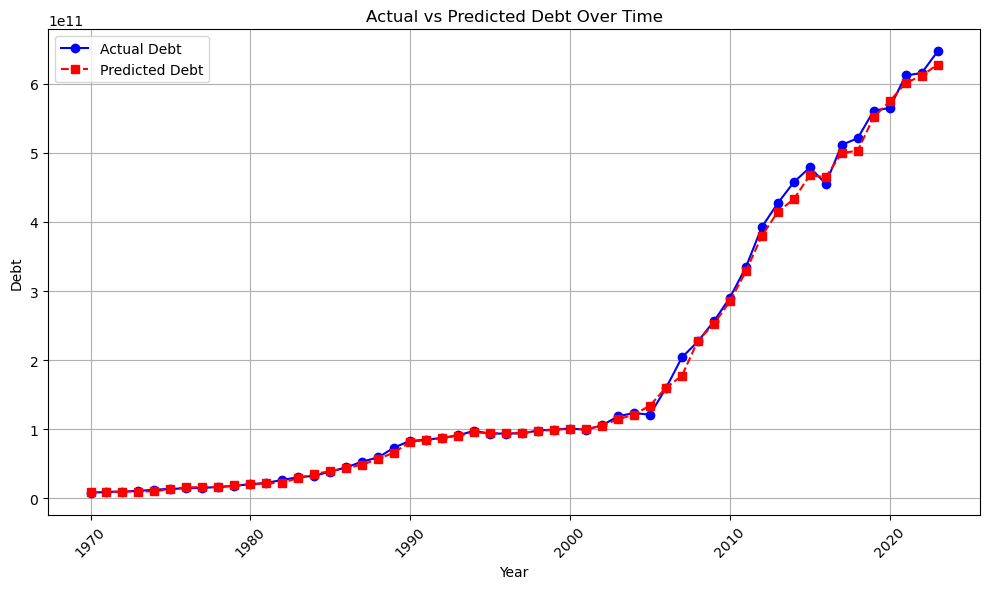

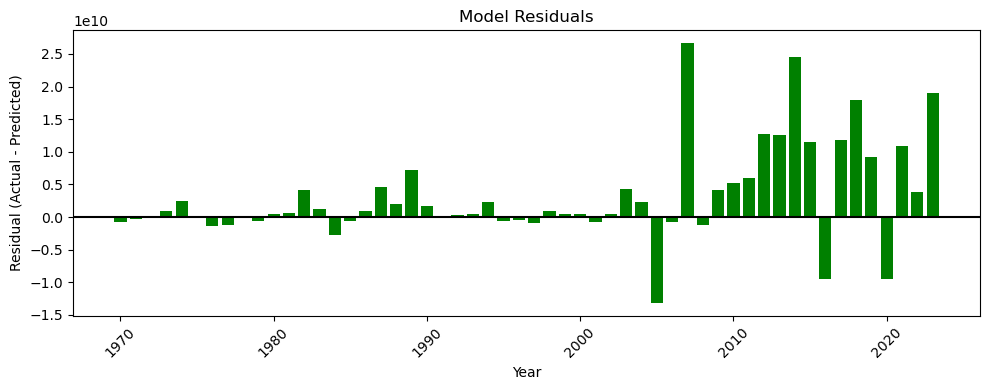

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(df['year'], df['debt'], 'o-', color='blue', label='Actual Debt')
plt.plot(df['year'], df['predicted_debt'], 's--', color='red', label='Predicted Debt')
plt.xlabel('Year')
plt.ylabel('Debt')
plt.title('Actual vs Predicted Debt Over Time')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot residuals
plt.figure(figsize=(10, 4))
plt.bar(df['year'], df['residual'], color='green')
plt.axhline(y=0, color='black', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Residual (Actual - Predicted)')
plt.title('Model Residuals')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

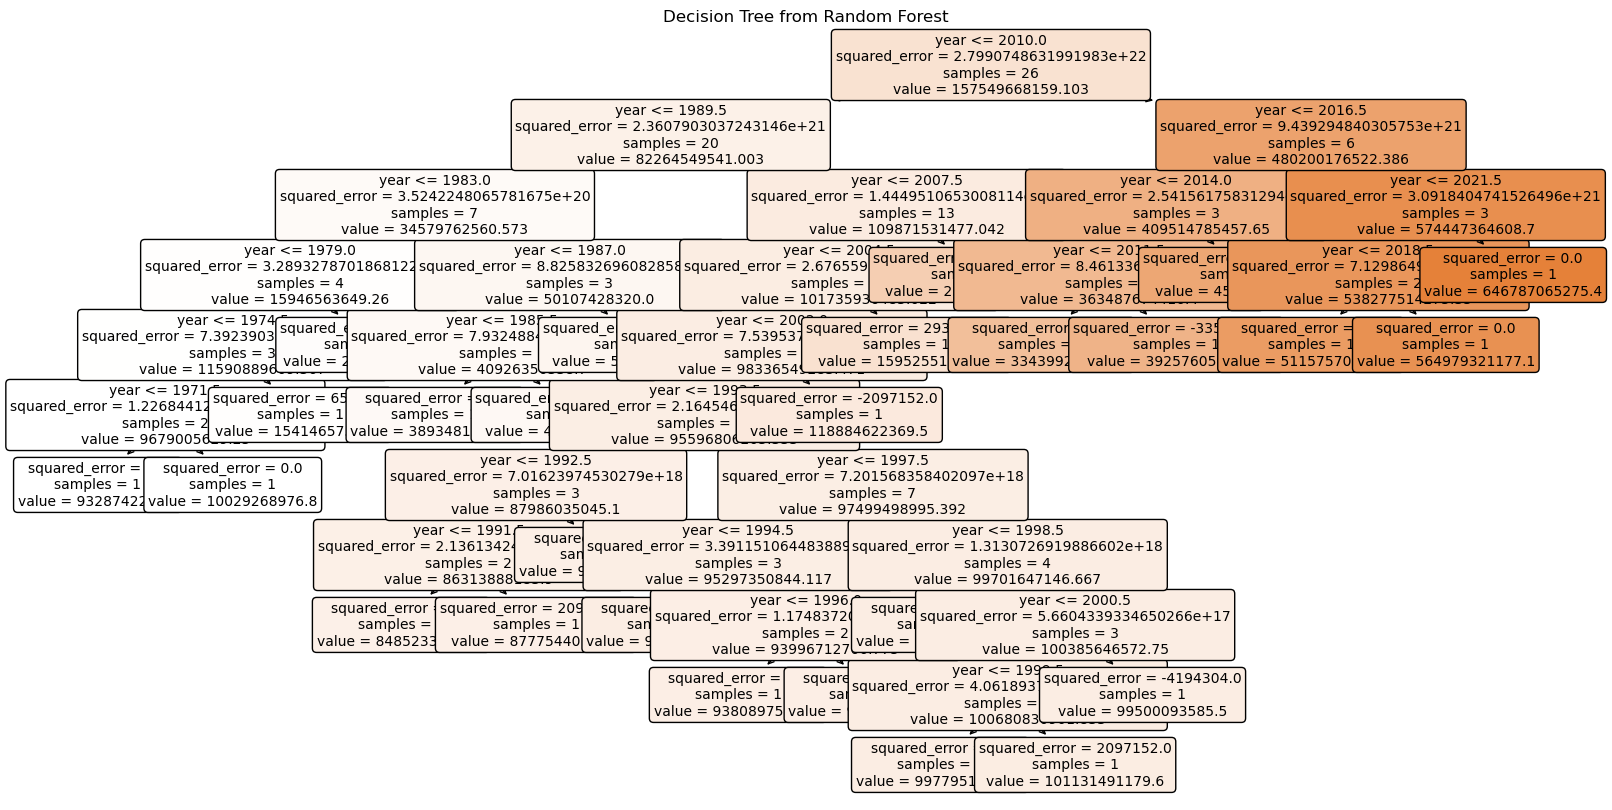

In [16]:
# Assuming regressor is your trained Random Forest model
# Pick one tree from the forest, e.g., the first tree (index 0)
tree_to_plot = rf_model.estimators_[0]

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(tree_to_plot, feature_names=df.columns.tolist(), filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree from Random Forest")
plt.show()

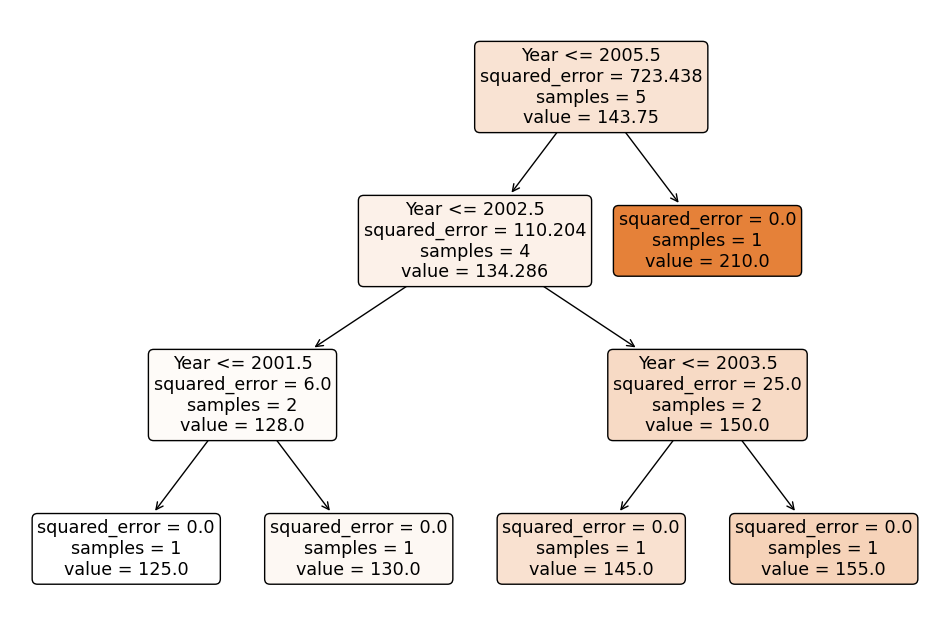

In [17]:
#sample
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import plot_tree

# Data
years = np.array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007]).reshape(-1, 1)
debt = np.array([120, 125, 130, 145, 155, 170, 190, 210])

# Train Random Forest model
rf = RandomForestRegressor(n_estimators=1, random_state=42)  # Single tree for visualization
rf.fit(years, debt)

# Visualize the first tree
plt.figure(figsize=(12, 8))
plot_tree(rf.estimators_[0], feature_names=["Year"], filled=True, rounded=True)
plt.show()
